In [115]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [116]:
dataset = pd.read_csv("1D.csv")
dataset = dataset.iloc[11:, :]*10**5 - 127873
openVal = dataset.iloc[:, 34]
closeVal = dataset.iloc[:, 37]
openVal = openVal
closeVal = closeVal
openVal = openVal.values
closeVal = closeVal.values
test = []
for i in range(len(openVal)):
    if closeVal[i] - openVal[i] < 0:
        test.append(0)
    else:
        test.append(1)
print(openVal)
print(closeVal)
print(test)

[  8333.   8448.   9324. ... -17691. -17911. -18229.]
[  8449.   9324.   8833. ... -17908. -18228. -18049.]
[1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 

In [117]:
print(max(dataset.iloc[:, 1:].max()))
print(min(dataset.iloc[:, 1:].min()))

32516.0
-32516.0


# Find high value by open value

In [118]:
x = dataset.iloc[:, 1:35]
y = dataset.iloc[:,   35]
x = x.values
y = y.values
y = y.reshape(len(y),1)
print(x)
print(y)

[[  9981.  10146.   9730. ...   9648.   8366.   8333.]
 [  9861.  10101.   9707. ...   8542.   8185.   8448.]
 [ 10059.  10437.   9692. ...   9401.   8302.   9324.]
 ...
 [-17300. -17203. -18232. ... -17645. -17732. -17691.]
 [-18095. -16921. -18190. ... -17338. -17920. -17911.]
 [-17423. -17239. -17953. ... -17866. -18463. -18229.]]
[[  8542.]
 [  9401.]
 [  9367.]
 ...
 [-17338.]
 [-17866.]
 [-17805.]]


In [119]:
from xgboost import XGBRegressor
regressorHigh = XGBRegressor()
regressorHigh.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [120]:
yPredHigh = regressorHigh.predict((x[:, :]))
np.set_printoptions(precision=2)
y = dataset.iloc[:, 35]
y = y.values
print(np.concatenate((yPredHigh.reshape(len(yPredHigh), 1), y.reshape(len(y), 1)), 1))

[[  8761.1    8542.  ]
 [  9055.73   9401.  ]
 [  9569.13   9367.  ]
 ...
 [-17419.68 -17338.  ]
 [-17775.02 -17866.  ]
 [-17734.56 -17805.  ]]


In [121]:
from sklearn.metrics import r2_score
r2_score(y, yPredHigh)

0.9998385932268274

In [122]:
diffHigh = []
for i in range(len(y)):
    diffHigh.append(abs(y[i] - yPredHigh[i]))
print(max(diffHigh))
print(np.mean(diffHigh))

1166.9481811523438
128.80806095167117


# Find next low

In [123]:
x = dataset.iloc[:, 1:35]
x = x.values
x = np.concatenate((x, yPredHigh.reshape(len(yPredHigh), 1)), 1)
print(x)

[[  9981.    10146.     9730.   ...   8366.     8333.     8761.1 ]
 [  9861.    10101.     9707.   ...   8185.     8448.     9055.73]
 [ 10059.    10437.     9692.   ...   8302.     9324.     9569.13]
 ...
 [-17300.   -17203.   -18232.   ... -17732.   -17691.   -17419.68]
 [-18095.   -16921.   -18190.   ... -17920.   -17911.   -17775.02]
 [-17423.   -17239.   -17953.   ... -18463.   -18229.   -17734.56]]


In [124]:
y = dataset.iloc[:, 36]
y = y.values
y = y.reshape(len(y),1)
print(y)

[[  8185.]
 [  8302.]
 [  8763.]
 ...
 [-17920.]
 [-18463.]
 [-18459.]]


In [125]:
from xgboost import XGBRegressor
regressorLow = XGBRegressor()
regressorLow.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [126]:
yPredLow = regressorLow.predict((x[:, :]))
np.set_printoptions(precision=2)
y = dataset.iloc[:, 36].values
print(np.concatenate((yPredLow.reshape(len(yPredLow), 1), y.reshape(len(y), 1)), 1))

[[  8145.76   8185.  ]
 [  8192.64   8302.  ]
 [  8930.86   8763.  ]
 ...
 [-17939.04 -17920.  ]
 [-18253.61 -18463.  ]
 [-18485.23 -18459.  ]]


In [127]:
from sklearn.metrics import r2_score
r2_score(y, yPredLow)

0.999853394298373

In [128]:
diffLow = []
for i in range(len(y)):
    diffLow.append(abs(y[i] - yPredLow[i]))
print(max(diffLow))
print(np.mean(diffLow))

1300.095703125
121.80190056870153


# Find close

In [129]:
x = dataset.iloc[:, 1:35]
x = x.values
x = np.concatenate((x, yPredHigh.reshape(len(yPredHigh), 1)), 1)
x = np.concatenate((x, yPredLow.reshape(len(yPredLow), 1)), 1)
print(x)

[[  9981.    10146.     9730.   ...   8333.     8761.1    8145.76]
 [  9861.    10101.     9707.   ...   8448.     9055.73   8192.64]
 [ 10059.    10437.     9692.   ...   9324.     9569.13   8930.86]
 ...
 [-17300.   -17203.   -18232.   ... -17691.   -17419.68 -17939.04]
 [-18095.   -16921.   -18190.   ... -17911.   -17775.02 -18253.61]
 [-17423.   -17239.   -17953.   ... -18229.   -17734.56 -18485.23]]


In [130]:
y = dataset.iloc[:, 37]
y = y.values
y = y.reshape(len(y),1)
print(y)

[[  8449.]
 [  9324.]
 [  8833.]
 ...
 [-17908.]
 [-18228.]
 [-18049.]]


In [131]:
from xgboost import XGBRegressor
regressorClose = XGBRegressor()
regressorClose.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [132]:
yPredClose = regressorClose.predict((x[:, :]))
np.set_printoptions(precision=2)
y = dataset.iloc[:, 37].values
print(np.concatenate((yPredClose.reshape(len(yPredClose), 1), y.reshape(len(y), 1)), 1))

[[  8344.37   8449.  ]
 [  8925.7    9324.  ]
 [  9071.54   8833.  ]
 ...
 [-17745.12 -17908.  ]
 [-18115.11 -18228.  ]
 [-18061.7  -18049.  ]]


In [133]:
from sklearn.metrics import r2_score
r2_score(y, yPredClose)

0.9998748513151869

In [134]:
diffClose = []
for i in range(len(y)):
    diffClose.append(abs(y[i] - yPredClose[i]))
print(max(diffClose))
print(np.mean(diffClose))

1093.1818847656396
114.69564001387374


# Checking ascending

In [135]:
x = dataset.iloc[:, 1:35]
x = x.values
x = np.concatenate((x, yPredHigh.reshape(len(yPredHigh), 1)), 1)
x = np.concatenate((x, yPredLow.reshape(len(yPredLow), 1)), 1)
print(x)

[[  9981.    10146.     9730.   ...   8333.     8761.1    8145.76]
 [  9861.    10101.     9707.   ...   8448.     9055.73   8192.64]
 [ 10059.    10437.     9692.   ...   9324.     9569.13   8930.86]
 ...
 [-17300.   -17203.   -18232.   ... -17691.   -17419.68 -17939.04]
 [-18095.   -16921.   -18190.   ... -17911.   -17775.02 -18253.61]
 [-17423.   -17239.   -17953.   ... -18229.   -17734.56 -18485.23]]


In [136]:
from xgboost import XGBClassifier
classifierAscending = XGBClassifier()
classifierAscending.fit(x, test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [137]:
from sklearn.metrics import confusion_matrix, accuracy_score
yPred = classifierAscending.predict(x)
cm = confusion_matrix(test, yPred)
print(cm)
accuracy_score(test, yPred)

[[2331   74]
 [  45 2489]]


0.9759060538570561

In [138]:
prediction = []
openValues = dataset.iloc[:, 34]
openValues = np.array(openValues)
print(openValues.shape)
for i in range(len(yPredClose)):
    if yPredClose[i] > openValues[i]:
        prediction.append(1)
    else:
        prediction.append(0)
cm = confusion_matrix(test, prediction)
print(cm)
accuracy_score(test, prediction)

(4939,)
[[2169  236]
 [ 228 2306]]


0.9060538570560842

In [139]:
diffHigh = np.array(diffHigh)
diffHigh = diffHigh.reshape(len(diffHigh), 1)
diffLow = np.array(diffLow)
diffLow = diffLow.reshape(len(diffLow), 1)
diffClose = np.array(diffClose)
diffClose = diffClose.reshape(len(diffClose), 1)
df = pd.DataFrame(np.array(diffClose))
diffHigh = np.array(diffHigh)
diffLow = np.array(diffLow)
df.insert(0, 'close error', diffClose)
df.insert(0, 'low error', diffLow)
df.insert(0, 'high error', diffHigh)
df.to_csv('errors.csv')

In [140]:
dataset = pd.read_csv('errors.csv')
dataset = dataset.iloc[:, 1:-1]
print(dataset)

      high error   low error  close error
0     219.100586   39.240234   104.634766
1     345.268555  109.355469   398.299805
2     202.134766  167.864258   238.544922
3      79.090820   70.453125   213.016602
4      20.326172  131.749023   121.743164
...          ...         ...          ...
4934   56.333984   25.779297    58.035156
4935    4.718750   97.664062    40.388672
4936   81.675781   19.041016   162.884766
4937   90.978516  209.390625   112.894531
4938   70.439453   26.228516    12.697266

[4939 rows x 3 columns]


In [141]:
x = []
for i in range(4989):
    x.append(i)

ValueError: x and y must be the same size

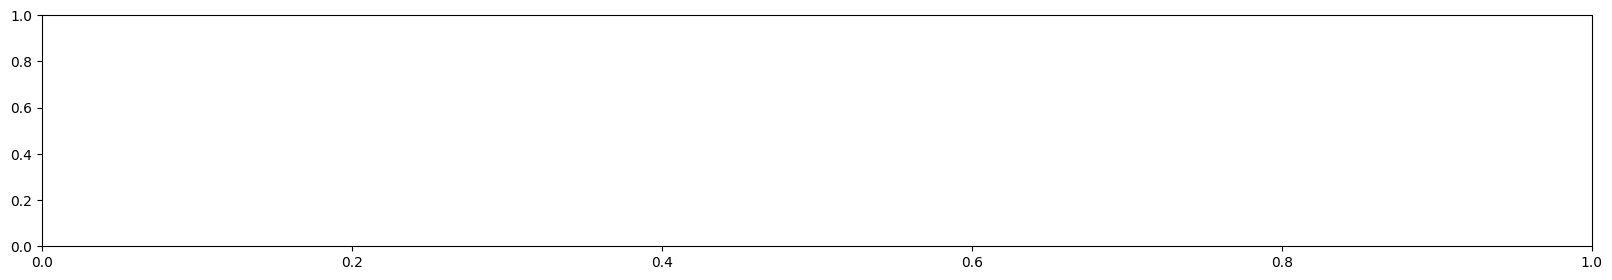

In [142]:
high = dataset.iloc[:, 0].values
plt.scatter(x=x, y=high, c='blue')
plt.xlabel('time')
plt.ylabel('error of high value')
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

In [ ]:
counterHigh = 0
for i in range(len(high)):
    if high[i] < 100:
        counterHigh += 1
print(counterHigh)

In [ ]:
low = dataset.iloc[:, 1].values
plt.scatter(x=x, y=low, c='red')
plt.xlabel('time')
plt.ylabel('error of low value')
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

In [ ]:
counterLow = 0
for i in range(len(low)):
    if low[i] < 100:
        counterLow+=1
print(counterLow)

In [ ]:
close = dataset.iloc[:, 2].values
plt.scatter(x=x, y=close, c='green')
plt.xlabel('time')
plt.ylabel('error of close value')
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

In [ ]:
counterClose = 0
for i in range(len(close)):
    if close[i] < 100:
        counterClose+=1
print(counterClose)

In [ ]:
print("percent of under 100 for high is " + str((counterHigh/len(high))*100))
print("percent of under 100 for low is " + str((counterLow/len(low))*100))
print("percent of under 100 for close is " + str((counterClose/len(close))*100))

In [ ]:
counterHigh = 0
for i in range(len(high)):
    if high[i] < 200:
        counterHigh += 1
counterLow = 0
for i in range(len(low)):
    if low[i] < 200:
        counterLow+=1
counterClose = 0
for i in range(len(close)):
    if close[i] < 200:
        counterClose+=1
print("percent of under 200 for high is " + str((counterHigh/len(high))*100))
print("percent of under 200 for low is " + str((counterLow/len(low))*100))
print("percent of under 200 for close is " + str((counterClose/len(close))*100))

In [ ]:
counterHigh = 0
for i in range(len(high)):
    if high[i] < 150:
        counterHigh += 1
counterLow = 0
for i in range(len(low)):
    if low[i] < 150:
        counterLow+=1
counterClose = 0
for i in range(len(close)):
    if close[i] < 150:
        counterClose+=1
print("percent of under 150 for high is " + str((counterHigh/len(high))*100))
print("percent of under 150 for low is " + str((counterLow/len(low))*100))
print("percent of under 150 for close is " + str((counterClose/len(close))*100))

In [ ]:
dataset